In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diamond_df=pd.read_csv('/content/drive/MyDrive/DataSets/diamonds (1).csv')
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


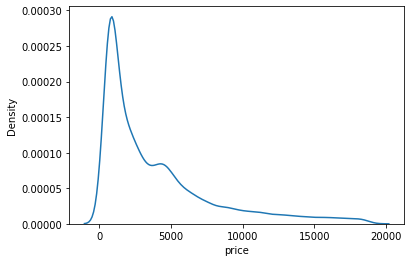

In [ ]:
sns.kdeplot(diamond_df.price)

In [ ]:
print('The Skewness of the distribution is ',diamond_df.price.kurt())
print('The Kurtosis of the distribution is ',diamond_df.price.skew())

The Skewness of the distribution is  2.17769575924869
The Kurtosis of the distribution is  1.618395283383529


## Observations:

- Since the skewness is greater than 1 there seem to be lot of prices which are extreme values. 
- Even the kurtosis is greater which indicates flatter tails which is clearly a lot to the right.

In [ ]:
sns.regplot(x=diamond_df.carat,y=diamond_df.price)
plt.show()

##Observations:

- We can see that there exists some relationship between carat and the price of the diamonds.

In [ ]:
sns.regplot(x=diamond_df.depth,y=diamond_df.price)
plt.show()

## Observations:

- There is not much effect of depth on diamond Price

In [ ]:
plt.figure(figsize=(10,8))
p=sns.heatmap(diamond_df.corr(), annot=True,cmap='RdYlGn',square=True)

## Observations:

- From the above heatmap we can see that only Carat,x,y,z have good affect on price variable. so let's consider these and build our model.

In [ ]:
diamond_df.describe()

The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [ ]:
print("Number of rows with x == 0: {} ".format((diamond_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_df.depth==0).sum()))

In [ ]:
diamond_df[['x','y','z']]=diamond_df[['x','y','z']].replace(0,np.NaN)

In [ ]:
diamond_df.isnull().sum()

## Treatment of data for missing values

In [ ]:
diamond_df.dropna(inplace=True)

In [ ]:
diamond_df.shape

In [ ]:
diamond_df.isnull().sum()

## What to do with the zero's in x,y and z?

In [ ]:
p = diamond_df.hist(figsize = (20,20),bins=150)

## Categorical Data Essense

In [ ]:
p = sns.factorplot(x='cut', data=diamond_df , kind='count',aspect=2.5 )

In [ ]:
p = sns.factorplot(x='cut',y='price',data=diamond_df , kind='box',aspect=2.5 )

In [ ]:
p = sns.factorplot(x='color', data=diamond_df , kind='count',aspect=2.5 )

In [ ]:
p = sns.factorplot(x='color', y='price', data=diamond_df, kind='box' ,aspect=2.5 )

In [ ]:
p = sns.factorplot(x='clarity', data=diamond_df , kind='count',aspect=2.5 )

In [ ]:
p = sns.factorplot(x='clarity', y='price', data=diamond_df, kind='box' ,aspect=2.5)

In [ ]:
numeric_columns=[]
for col in diamond_df.columns:
    if ( diamond_df[col].dtype =="int64" or  diamond_df[col].dtype=='float64'):
        numeric_columns.append(col)

In [ ]:
from collections import Counter
def detect_outliers(diamond_df,features):
    outlier_indices = []
    for c in features:
      Q1 =diamond_df[c].quantile(0.25)
      Q3 =diamond_df[c].quantile(0.75)
      IQR = Q3 - Q1
      outlier_list_col =diamond_df[(diamond_df[c] < (Q1 - 1.5 * IQR)) |(diamond_df[c] > (Q3 + 1.5 * IQR))].index
      outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
diamond_df.loc[detect_outliers(diamond_df,numeric_columns)]
diamond_df =diamond_df.drop(detect_outliers(diamond_df,numeric_columns),axis = 0).reset_index(drop = True)

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

In [ ]:
diamond_clean_data_ =  pd.get_dummies(diamond_df,drop_first=True)
diamond_clean_data_.head()

In [ ]:
X=diamond_clean_data_.drop('price',axis=1)
Y=diamond_clean_data_['price']

In [ ]:
numerical_col=X.select_dtypes(include=['int64','float64'])
numerical_col

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =pd.DataFrame(sc_X.fit_transform(numerical_col),columns=['carat','depth','x','y','z','table'],index=numerical_col.index)

In [ ]:
numericals

In [ ]:
cat_col=X.select_dtypes(include='uint8')
cat_col

In [ ]:
Scaled_df=pd.concat([numericals,cat_col],axis=1)
Scaled_df

In [ ]:
Scaled_df=pd.concat([Scaled_df,Y],axis=1)

In [ ]:
Scaled_df

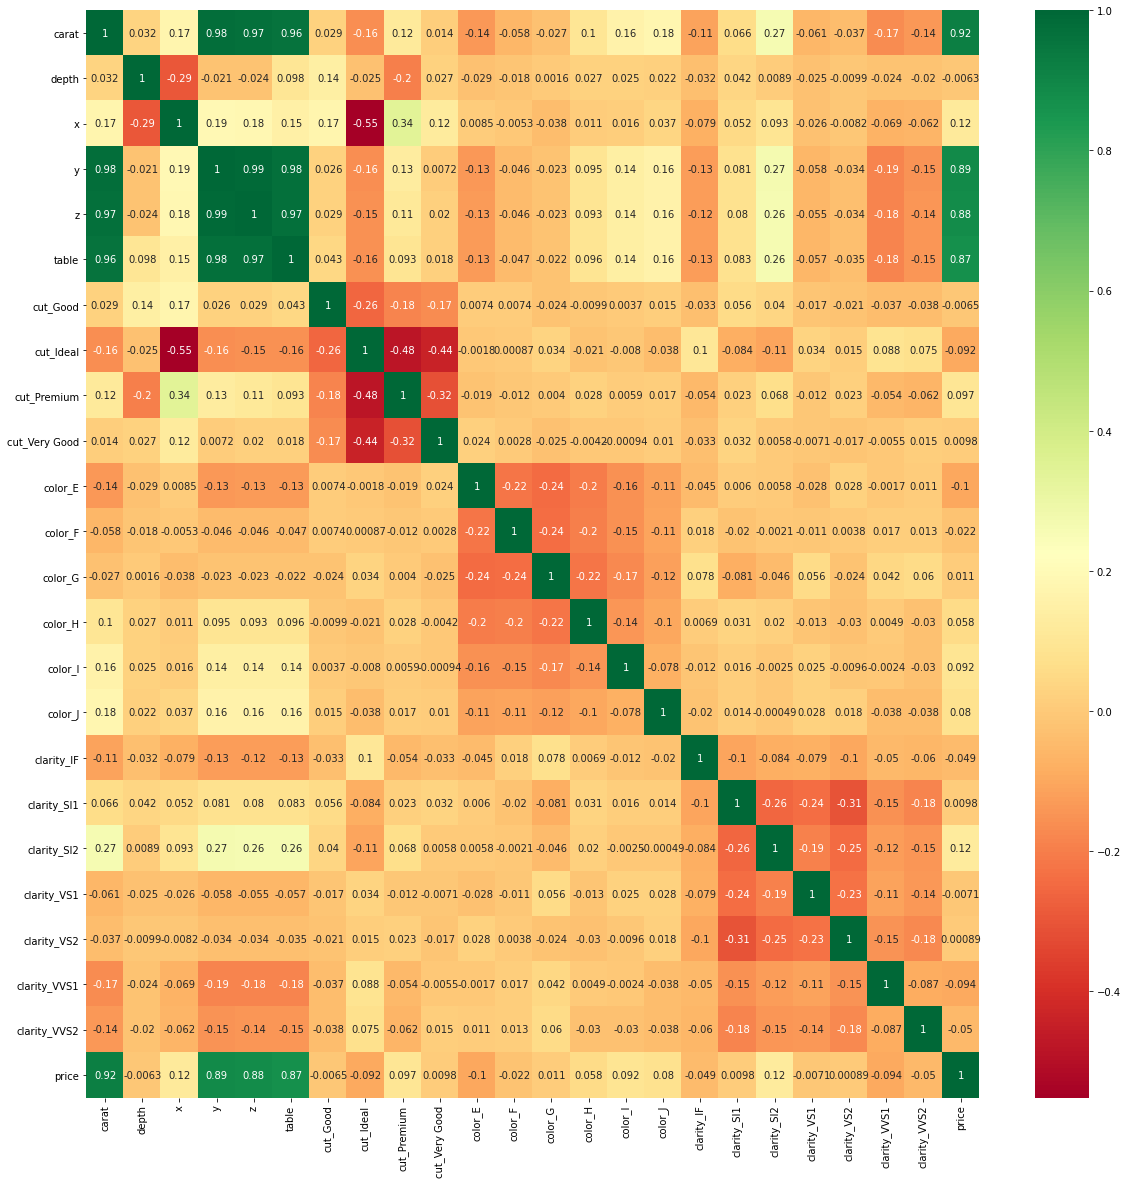

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(Scaled_df.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
X=Scaled_df.drop('price',axis=1)
Y=Scaled_df['price']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 2,test_size=0.3)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((37623, 23), (16125, 23), (37623,), (16125,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 89.94098009685445%
Mean absolute error: 714.3063958362018
Mean squared error: 1523371.2585364324
R Squared: 0.8994098009685444
Adjusted R Squared: 0.89927236559538


In [ ]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 90.02886288334732%
Mean absolute error: 713.7196694489229
Mean squared error: 1510061.9985536097
R Squared: 0.9002886288334732
Adjusted R Squared: 0.9001523941939462


In [ ]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 91.58457084252038%
Mean absolute error: 706.8400791397668
Mean squared error: 1274460.4375168807
R Squared: 0.9158457084252039
Adjusted R Squared: 0.9157307292664257


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189288831.2642365, tolerance: 58996817.23741253
  positive)


## Using all the regressors of Classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, 
                                                                  Y, 
                                                                  shuffle=True,
                                                                  test_size=0.2, 
                                                                  random_state=100)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=100)

In [ ]:
# delete intermediate variables
del X_intermediate, y_intermediate

In [ ]:
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(Y),2),
                                                       round(len(y_validation)/len(Y),2),
                                                       round(len(y_test)/len(Y),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [ ]:
X_train

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
9071,0.445655,0.738373,1.601479,0.529305,0.573173,0.639147,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45353,-0.607777,0.808805,-0.201832,-0.552226,-0.573558,-0.466078,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2952,0.080179,1.442698,-1.554315,0.213858,0.284233,0.423843,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
46064,-0.586279,-0.036385,-1.103487,-0.498149,-0.474235,-0.480431,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3561,0.295165,-1.656334,1.601479,0.466215,0.473849,0.251600,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32880,-1.016251,0.174912,-1.103487,-1.201144,-1.178526,-1.155049,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
38819,-0.844262,-0.177250,-1.103487,-0.840634,-0.862497,-0.853624,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
33336,-0.951755,0.527075,-1.103487,-1.102003,-1.061144,-1.011513,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
22619,0.897126,0.034047,-0.201832,0.979942,1.024641,0.997986,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
42082,-1.209738,0.104480,-0.201832,-1.633756,-1.611935,-1.585656,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
37125,-0.887259,0.597508,-1.779729,-1.002863,-0.961821,-0.911038,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
30331,-1.145243,-0.318115,-0.201832,-1.444488,-1.422319,-1.442120,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
10243,0.467154,1.372266,1.150652,0.520292,0.564143,0.710915,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
36658,-0.908758,-0.388548,1.150652,-0.984838,-1.025026,-1.025867,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0.467154,-0.388548,-1.554315,0.691534,0.717643,0.639147,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
35748,-0.822763,-1.022441,2.503135,-0.831621,-0.853468,-0.925392,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
36884,-0.822763,-1.374604,0.699824,-0.786557,-0.817351,-0.925392,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
17085,0.488652,0.527075,-0.201832,0.574368,0.618319,0.653500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_train

9071      4520
45353     1687
2952      3295
46064     1754
3561      3418
         ...  
32880      814
38819     1056
33336      829
22619    10685
49701     2177
Name: price, Length: 32248, dtype: int64

In [ ]:
y_test

42082     505
37125     979
30331     733
10243    4749
36658     957
         ... 
9785     4666
35748     920
36884     969
17085    6816
9005     4513
Name: price, Length: 10750, dtype: int64

In [ ]:
X_validation

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
8354,-0.048813,-1.092873,0.248996,0.186820,0.221027,0.065004,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
53478,0.101677,-0.458980,-0.201832,0.331024,0.356468,0.280308,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
37847,-1.059248,1.231401,0.248996,-1.273246,-1.350084,-1.183756,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3844,0.101677,-0.036385,-1.103487,0.312999,0.347438,0.323368,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
33509,-0.994752,-0.458980,-0.652659,-1.129042,-1.106291,-1.140695,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.467154,1.372266,-0.652659,0.583381,0.509967,0.710915,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
79,-1.145243,0.597508,0.699824,-1.498565,-1.476495,-1.413413,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
12119,1.090614,0.104480,-0.201832,1.160197,1.105905,1.127168,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
14147,0.445655,-1.163306,2.052307,0.592394,0.672496,0.466904,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
y_validation

8354     4399
53478    2709
37847    1010
3844     3475
33509     838
         ... 
16304    6529
79        554
12119    5169
14147    5743
38408    1038
Name: price, Length: 10750, dtype: int64

In [ ]:
dt_reg=DecisionTreeRegressor()

In [ ]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
new_train_error = mean_squared_error(y_train, dt_reg.predict(X_train))
new_validation_error = mean_squared_error(y_validation, dt_reg.predict(X_validation))
new_test_error = mean_squared_error(y_test, dt_reg.predict(X_test))
# print errors as report
print(' train error: {:5} | val error: {:6} | test error: {}'.
          format(
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))

 train error: 65.923 | val error: 726125.342 | test error: 640351.223


In [ ]:
print("Mean squared error: {}".format(mean_squared_error(y_test, dt_reg.predict(X_test))))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, dt_reg.predict(X_test)))))
R2 = r2_score(y_test,dt_reg.predict(X_test))
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - ((1 - R2) * ((n - 1)/(n-p-1)))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean squared error: 640351.2229069767
Root Mean squared error: 800.2194842085369
R Squared: 0.9592237800254477
Adjusted R Squared: 0.9591401520922473


In [ ]:
knn_reg=KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
new_train_error = mean_squared_error(y_train, knn_reg.predict(X_train))
new_validation_error = mean_squared_error(y_validation, knn_reg.predict(X_validation))
new_test_error = mean_squared_error(y_test, knn_reg.predict(X_test))
# print errors as report
print(' train error: {:5} | val error: {:6} | test error: {}'.
          format(
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3))) 

 train error: 606865.777 | val error: 780834.828 | test error: 721214.281


In [ ]:
print("Mean squared error: {}".format(mean_squared_error(y_test, knn_reg.predict(X_test))))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, knn_reg.predict(X_test)))))
R2 = r2_score(y_test,knn_reg.predict(X_test))
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - ((1 - R2) * ((n - 1)/(n-p-1)))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean squared error: 721214.280979535
Root Mean squared error: 849.2433579248853
R Squared: 0.9540745904466209
Adjusted R Squared: 0.9539804020425774


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
new_train_error = mean_squared_error(y_train, rf.predict(X_train))
new_validation_error = mean_squared_error(y_validation, rf.predict(X_validation))
new_test_error = mean_squared_error(y_test, rf.predict(X_test))
# print errors as report
print(' train error: {:5} | val error: {:6} | test error: {}'.
          format(
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))

 train error: 57556.061 | val error: 393350.596 | test error: 378563.83


In [ ]:
print("Mean squared error: {}".format(mean_squared_error(y_test, rf.predict(X_test))))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))))
R2 = r2_score(y_test,rf.predict(X_test))
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - ((1 - R2) * ((n - 1)/(n-p-1)))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean squared error: 378563.82961140346
Root Mean squared error: 615.2754095617697
R Squared: 0.9758938510016932
Adjusted R Squared: 0.9758444117103757


In [ ]:
adaboost_reg=AdaBoostRegressor(learning_rate=0.01)

In [ ]:
adaboost_reg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
new_train_error = mean_squared_error(y_train, adaboost_reg.predict(X_train))
new_validation_error = mean_squared_error(y_validation, adaboost_reg.predict(X_validation))
new_test_error = mean_squared_error(y_test, adaboost_reg.predict(X_test))
# print errors as report
print(' train error: {:5} | val error: {:6} | test error: {}'.
          format(
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))

 train error: 1952272.182 | val error: 2029050.268 | test error: 1930522.911


In [ ]:
print("Mean squared error: {}".format(mean_squared_error(y_test, adaboost_reg.predict(X_test))))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, adaboost_reg.predict(X_test)))))
R2 = r2_score(y_test,adaboost_reg.predict(X_test))
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - ((1 - R2) * ((n - 1)/(n-p-1)))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean squared error: 1930522.9107750433
Root Mean squared error: 1389.4325859051396
R Squared: 0.8770683586449376
Adjusted R Squared: 0.8768162381909606
